# Computational Science project:
•	Choose a topic or problem in any area of computational science 
•	Develop a computational science solution that is based on Python and its extension modules.
•	description of your  problem
o	what problem are you trying to solve?
o	your investigation should incorporate some of the signature computational science techniques:  modeling, simulation, visualization
•	indicate the specific Python features and modules employed
o	e.g. built-in Python features, NumPy, SciPy, matplotlib, other libraries/extensions
 
     There should be an "experimental flavor" to your project.  A user should learn       something about your problem by executing your code.
In detail description of the project regarding what is done and what are you trying to model and simulate


# Modeling wine preferences by data mining from physicochemical properties
## Linear Regression and Random Forest

In this work we will use data mining techniques on collected wine sets and
evaluate wine quality by given raw data.

Wine can be classified by human experts or by physicochemical laboratory tests – pH or alcohol values or
density determination.

But there is another method how to classify wine. 

Input variables (based on physicochemical tests):

   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
   
   
Output variable (based on sensory data):

   12 - quality (score between 0 and 10)

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import statsmodels.stats.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read data
wine = pd.read_csv('wine_data.csv', sep='\t')

In [3]:
wine.head()

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),Alcohol (%),quality
0,red,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


We see 11 signs describing the chemical composition of the wines.
Here is the distribution of expert evaluation of wines in the sample:


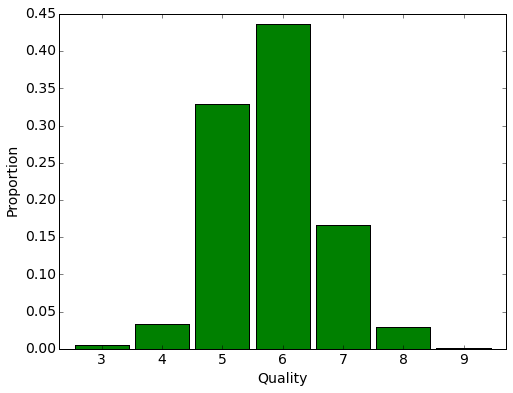

In [4]:
plt.figure(figsize(8,6))
stat = wine.groupby('quality')['quality'].agg(lambda x : float(len(x))/wine.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="green")
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

# Type and Quality of Wine

In [5]:
y = wine[['Type', 'quality']]
y.head()

,Type,quality
0,red,5
1,red,5
2,red,5
3,red,6
4,red,5


In [6]:
wine.groupby('Type')['Type'].count()

Type
red      1599
white    4898
Name: Type, dtype: int64

We separate 25% of the set for the quality prediction control.

In [7]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.ix[:, wine.columns != 'quality'], 
                                                    wine['quality'], 
                                                    test_size=0.25)

In [8]:
X_train['Type'] = X_train['Type'].apply(lambda x : -1 if x == 'red' else 1)
X_test['Type'] = X_test['Type'].apply(lambda x : -1 if x == 'red' else 1)

If we do not have any more information about the wines, our best guess on the assessment – - the average, available in the training set:

In [9]:
np.mean(y_train)

5.8169129720853858

If we predict this value assessment of all the winse oin the training set, we get the average square error.

In [10]:
sqrt(mean_squared_error([np.mean(y_train)]*len(y_train), y_train))

0.87670621485856171

and on the test

In [11]:
sqrt(mean_squared_error([np.mean(y_train)]*len(y_test), y_test))

0.8625590794770277

On the test sample the error is greater, since we evaluate the average by the teaching. This is a natural effect.
To clarify our prediction, it is possible to predict the value of every wine by the average estimation of wines of the same type in the sample:


In [12]:
regressor = LinearRegression()
regressor.fit(X_train['Type'].reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_train_predictions = regressor.predict(X_train['Type'].reshape(-1,1))

In [14]:
y_test_predictions = regressor.predict(X_test['Type'].reshape(-1,1))

Prediction errors have decreased slightly:

In [15]:
sqrt(mean_squared_error(y_train_predictions, y_train))

0.87064224152662018

In [16]:
sqrt(mean_squared_error(y_test_predictions, y_test))

0.85579069866207058

Here is the true evaluation of wines and their average prediction by the types on a test sample:

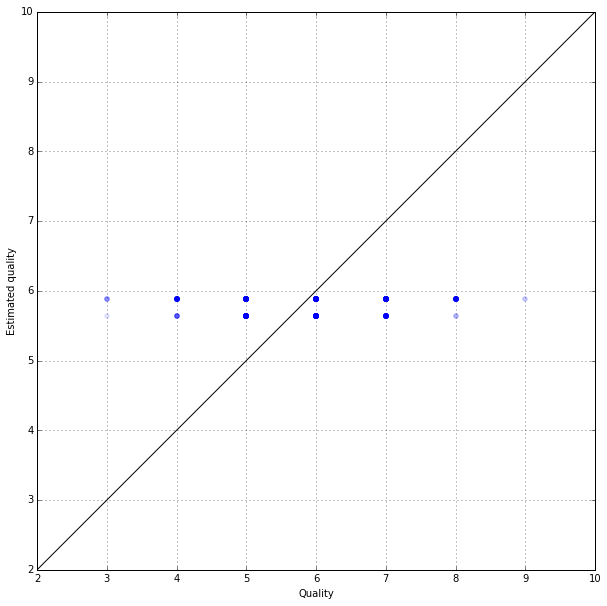

In [17]:
pyplot.figure(figsize(10,10))
pyplot.scatter(y_test, y_test_predictions, color="blue", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
plt.xlabel('Quality')
plt.ylabel('Estimated quality')

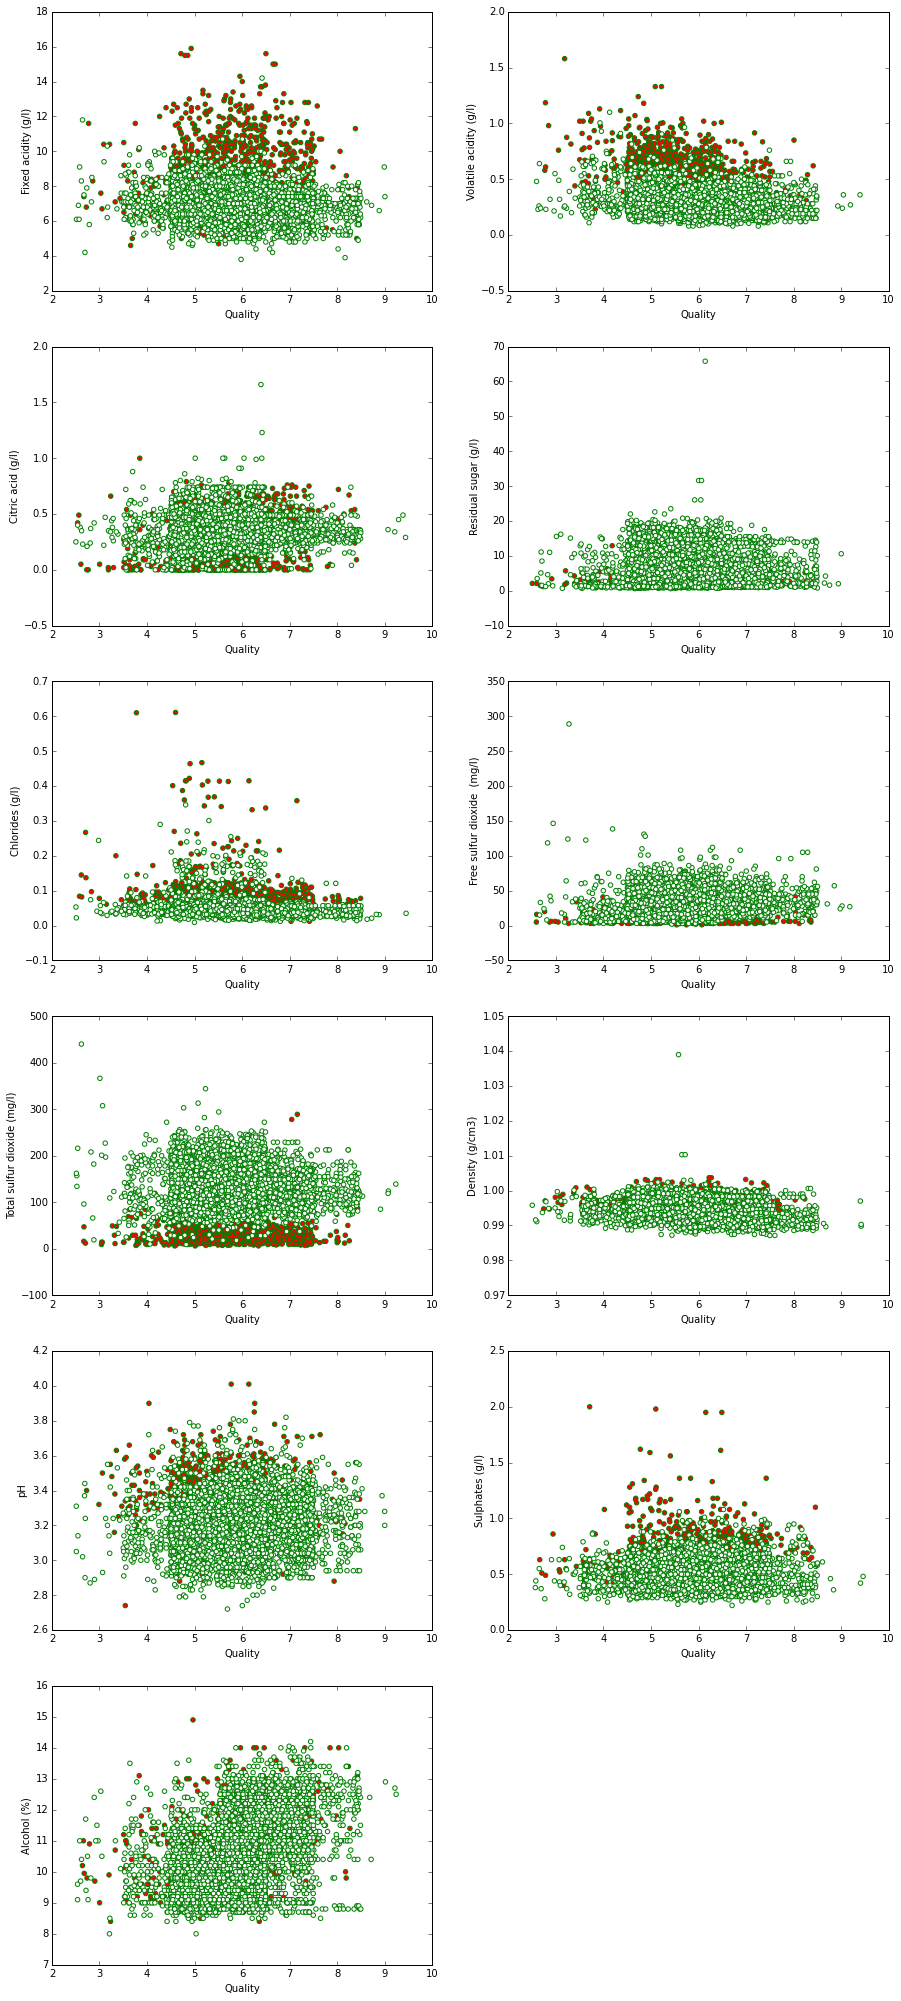

In [18]:
def fun(v):
    return v + np.random.uniform(low=-0.5, 
                                 high=0.5, 
                                 size=len(v))

pyplot.figure(figsize(15, 35))
for i in range (1, 12):
    pyplot.subplot(6, 2, i)
    pyplot.scatter(fun(wine['quality']), wine.ix[:, i], 
                   color=wine["Type"], 
                   edgecolors="green")
    pyplot.xlabel('Quality')
    pyplot.ylabel(str(wine.columns[i]))

## Linear Regression

To begin with, let us construct the linear regression model.

In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The prediction errors were essentially reduced:

In [20]:
sqrt(mean_squared_error(lm.predict(X_train), y_train))

0.73840949206442807

In [21]:
sqrt(mean_squared_error(lm.predict(X_test), y_test))

0.71457788648123488

The true evaluation of wines and their predictions by the linear model:

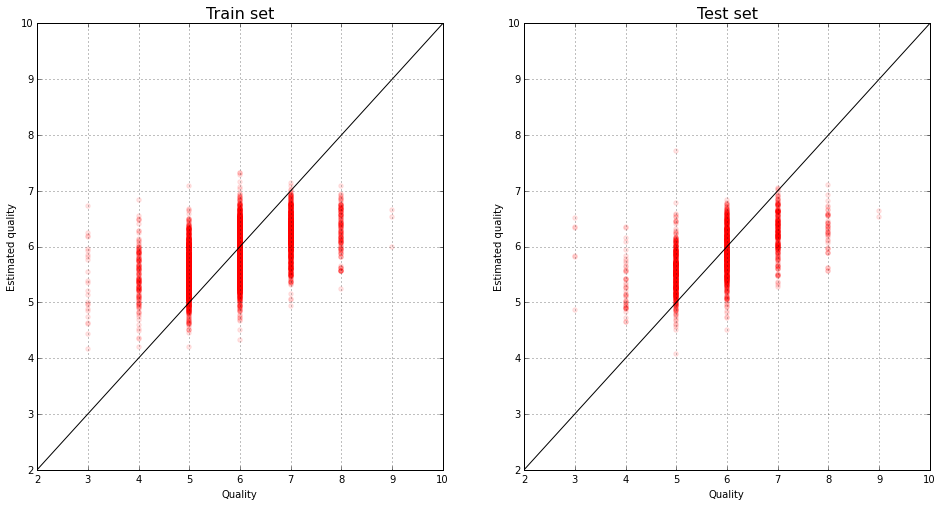

In [22]:
plt.figure(figsize(16,8))
plt.subplot(121)
pyplot.scatter(y_train, lm.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

plt.subplot(122)
pyplot.scatter(y_test, lm.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

We calculate the coefficient of determination - the proportion by the explained model of the disperse response.

In [23]:
lm.score(X_test, y_test)

0.31365659929719758

 ## Random Forest

We construct the random forest on the teaching set:

In [24]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)

In [25]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

The quality has increased, though the model has been retrained.

In [26]:
sqrt(mean_squared_error(rf.predict(X_train), y_train))

0.35262460471153395

In [27]:
sqrt(mean_squared_error(rf.predict(X_test), y_test))

0.60694168473930055

The true evaluation of wines and their predictions by the random forest:

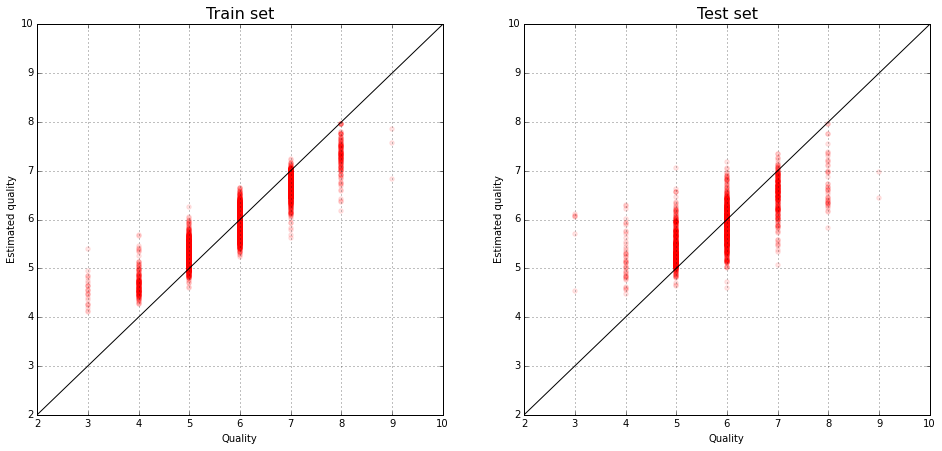

In [28]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

plt.subplot(122)
pyplot.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

The coefficient of determination for the random forest:

In [29]:
rf.score(X_test, y_test)

0.50485060884990918

We compare the errors of the linear regression and random forest on a test sample:

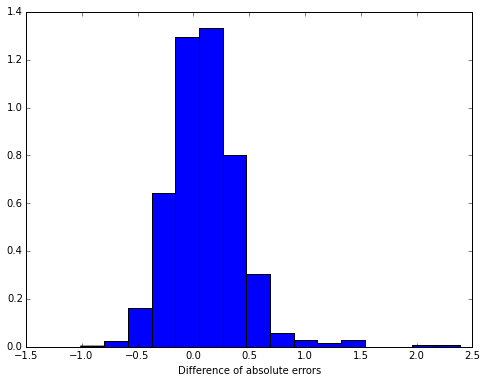

In [30]:
plt.figure(figsize(8,6))
plt.hist(abs(y_test - lm.predict(X_test)) - abs(y_test - rf.predict(X_test)), bins=16, normed=True)
plt.xlabel('Difference of absolute errors')

The differences between the average absolute errors are significant:

In [31]:
tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - lm.predict(X_test))), 
                         sm.DescrStatsW(abs(y_test - rf.predict(X_test))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

6.0766386407976045e-13

95% confidence interval for the average difference of absolute errors.

In [32]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.079701943166600675, 0.13903686377836694)

That is, using our random forest instead of linear regression, we predict the expert evaluation more accurately.
Let’s see what signs have the greatest predictive power:


In [ ]:
importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_))
importances.columns = ['feature name', 'importance']
importances.sort(ascending=False)

The alcohol content has the greatest influence on the expert evaluation of wine quality.

# Conclusion
In this work we solved the regression problem. The algorithms we chose are called linear regression and random forest. We predict that random forest has a better value. It is more exact. The alcohol content has the greatest influence on the expert evaluation of wine quality.
The prediction model in this work can bear quite good results.


# Reference
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib
